In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [91]:
# Carregar os dados de exemplo
#data = pd.read_excel('BD completo.xlsx')
data = pd.read_excel('dados_filtrados.xlsx')

# Aplicar o mapeamento na coluna do dataframe
data['Situação'] = data['Situação'].map(mapeamento)

for column in data.columns:
    # Calcular a moda da coluna
    mode_value = data[column].mode()[0]
    
    # Substituir os valores NaN pela moda da coluna
    data[column].fillna(mode_value, inplace=True)


print(data)


     Situação   Valor de M.    LPA    VPA    P/L  EV/EBITDA  Dividend Yield  \
0         2.0  1.334627e+09   0.57  36.03  24.71       4.81            0.85   
1         2.0  1.519060e+10   0.18   0.80  14.92       4.81           15.27   
2         2.0  9.465319e+07   0.16   2.07  31.55       4.81            2.98   
3         2.0  2.819886e+08   0.21   1.23  21.69       4.81            4.25   
4         2.0  2.887665e+08   0.60  10.42   5.65       4.81            0.46   
..        ...           ...    ...    ...    ...        ...             ...   
371       2.0  1.815159e+07 -34.50 -59.76  -0.20       4.81            0.46   
372       2.0  5.034333e+09   0.21   1.69  15.64       9.40            0.46   
373       2.0  6.750600e+04   0.00   0.01  -0.16       4.81            0.46   
374       2.0  1.412889e+08  -0.52  11.61  -7.35       4.81            2.00   
375       2.0  6.750600e+04   0.00   0.01  -0.16       4.81            0.46   

     Margem Bruta  Margem EBITDA  Margem Liquida   

In [92]:
# Aplicar o algoritmo K-means para criar os clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


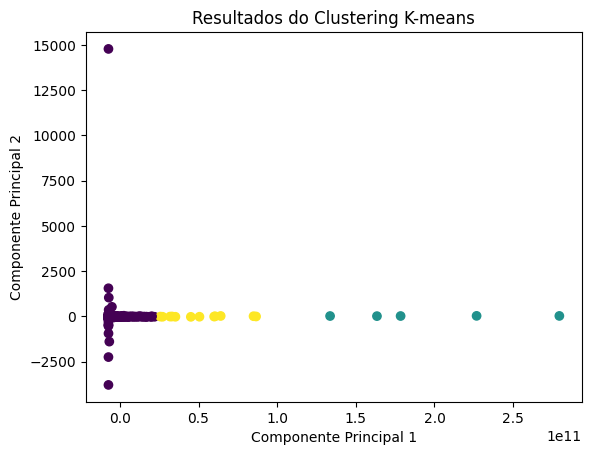

In [93]:
# Reduzir a dimensionalidade dos dados para visualização
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data)

# Plotar os pontos de dados com cores representando os clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=clusters)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados do Clustering K-means')
plt.show()

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


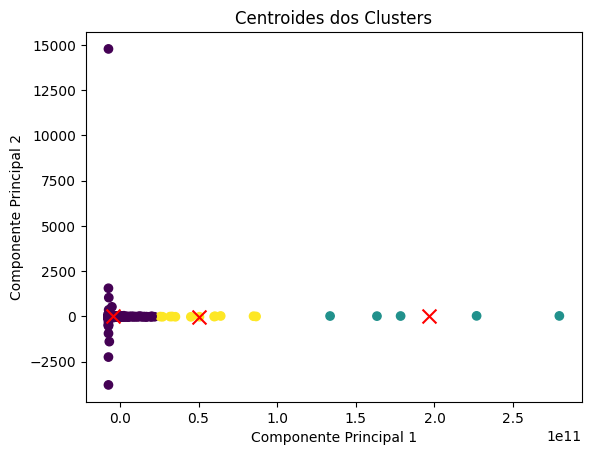

   Situação   Valor de M.       LPA       VPA       P/L  EV/EBITDA  \
0       2.0  2.874435e+09 -7.144011  34.70415  8.930279   5.662869   
1       2.0  2.036285e+11  1.794000  17.44200  7.686000   7.148000   
2       2.0  5.769852e+10  1.287500  11.42000  9.809167  12.049167   

   Dividend Yield  Margem Bruta  Margem EBITDA  Margem Liquida        ROE  \
0        1.594485     84.532813     -18.452730       10.378983  16.564318   
1        2.540000     67.796000      22.658000        8.304000  17.600000   
2        3.026667     55.905000      37.051667       21.485000  24.166667   

         ROA  Div Liquida/EBITDA  Liq. Corrente  
0   3.987465            1.655515       1.872730  
1   6.800000            2.402000       1.278000  
2  10.833333            2.003500       1.476667  


In [94]:
# Analisar a interpretabilidade dos clusters
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Visualizar os centroides dos clusters
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=clusters)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, color='red')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Centroides dos Clusters')
plt.show()

# Examinar os atributos mais importantes para cada cluster
feature_importances = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
print(feature_importances)



In [95]:
# Calcular as métricas de avaliação do clustering
silhouette_score = silhouette_score(data, clusters)
davies_bouldin_index = davies_bouldin_score(data, clusters)
print(f'Silhouette Score: {silhouette_score}')
print(f'Davies-Bouldin Index: {davies_bouldin_index}')

Silhouette Score: 0.8878866024334766
Davies-Bouldin Index: 0.4140916087741046
